In [1]:
!pip install nbconvert

# Getting Started
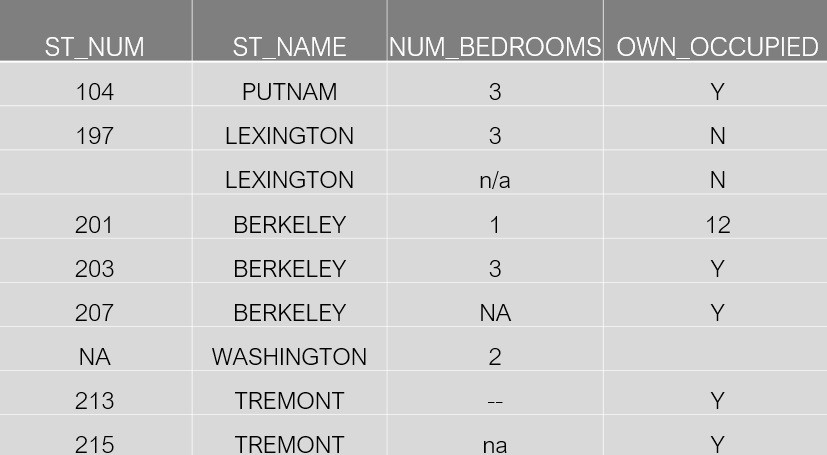






In [1]:
# Importing libraries
import pandas as pd
import numpy as np

# Read csv file into a pandas dataframe
df = pd.read_csv("property data.csv")

# Take a look at the first few rows
print(df.head())

           PID  ST_NUM    ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0     PUTNAM            Y            3        1  1000
1  100002000.0   197.0  LEXINGTON            N            3      1.5    --
2  100003000.0     NaN  LEXINGTON            N          NaN        1   850
3  100004000.0   201.0   BERKELEY           12            1      NaN   700
4          NaN   203.0   BERKELEY            Y            3        2  1600


# Standard Missing Values

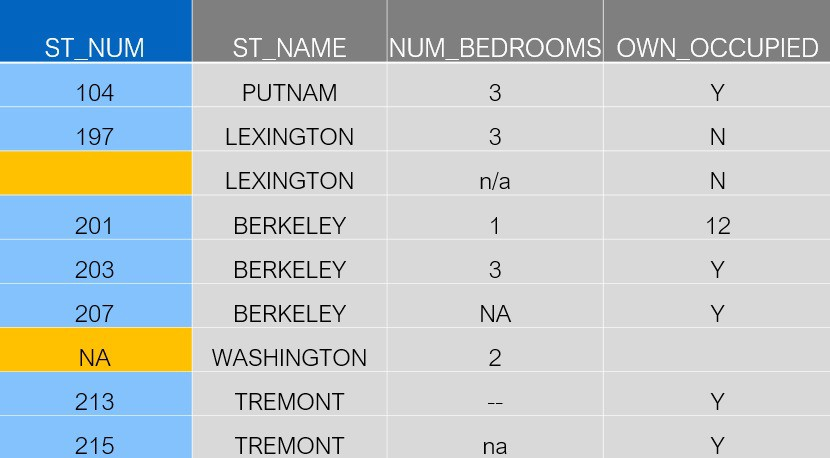

In [8]:
# Looking at the ST_NUM column
print(df['ST_NUM'])
print(df['ST_NUM'].isnull())

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64
0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool


# Non-Standard Missing Values
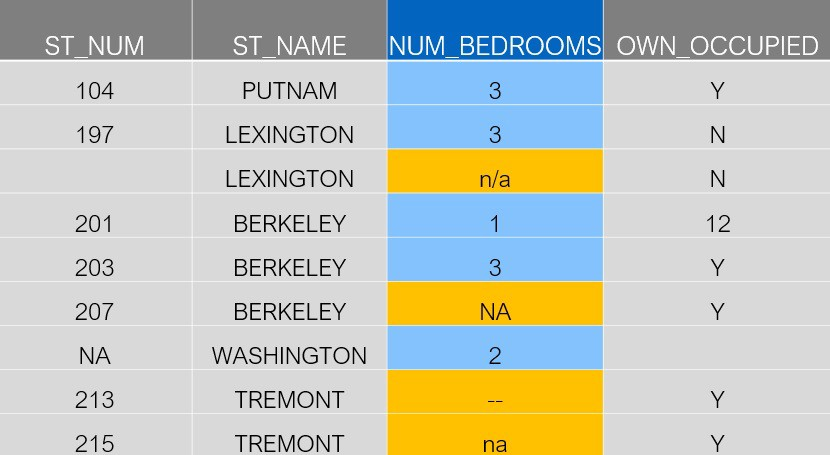

In [9]:
# Looking at the NUM_BEDROOMS column
print(df['NUM_BEDROOMS'])
print(df['NUM_BEDROOMS'].isnull())

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7      1
8     na
Name: NUM_BEDROOMS, dtype: object
0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


## Solution

In [24]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("property data.csv", na_values = missing_values)
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


## Unexpected Missing Values
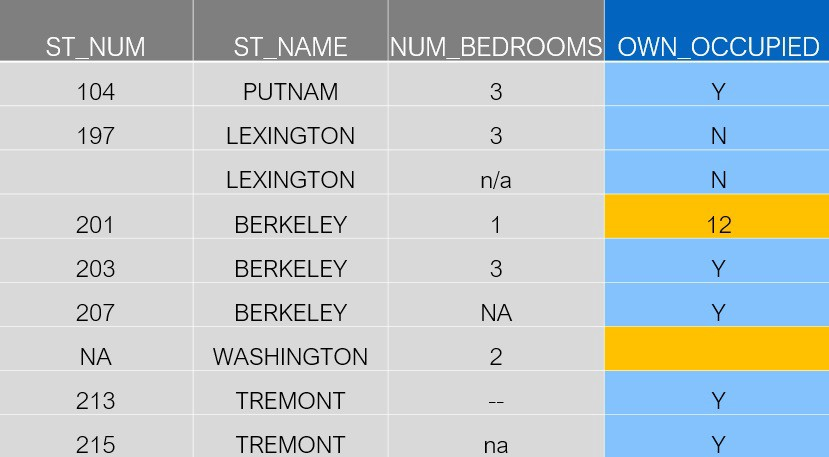

## Solution

In [19]:
# Detecting numbers 
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


# Summarizing Missing Values



In [17]:
# Total missing values for each feature
print(df.isnull().sum())

# checking if there are Any missing values?
print(df.isnull().values.any())

# We might also want to get a total count of missing values.

# Total number of missing values
print(df.isnull().sum().sum())

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64
True
8


# Replacing

In [25]:
# Replace missing values with a number
df['ST_NUM'].fillna(125, inplace=True)


# Location based replacement
df.loc[2,'ST_NUM'] = 125

# best method
# Replace using median 

median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [26]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,2.5,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


# Additional Material 
## Regular Expression
 

In [30]:
import re
list_tweets = ['Ali, he\'s a good guy.']

for tweet in list_tweets:
    tweet = tweet.lower()
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","are not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)

In [31]:
tweet

'ali he is good guy '